In [8]:
import pandas as pd
from skimage import io, transform, color
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as fn
from torchvision import models
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import dataset, dataloader, Dataset
from torchvision import transforms, utils

In [9]:
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [10]:
from dataloader import load_data, ImageDataset, Rescale, ToTensor, GetAlexConv

test_df, train_df = load_data()
train_dataset = ImageDataset(
    train_df,
    transform=transforms.Compose(
        [
            Rescale((227, 227)),
            ToTensor(),
        ]
    ),
    alexnet_feature=GetAlexConv(layer_number=[2, 2], layer_name="fc6"),
)
test_dataset = ImageDataset(
    test_df,
    transform=transforms.Compose(
        [
            Rescale((227, 227)),
            ToTensor(),
        ]
    ),
    alexnet_feature=GetAlexConv(layer_number=[2, 2], layer_name="fc6"),
)


trainloader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=0
)
testloader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=True, num_workers=0
)

print("train_dataset:", len(train_dataset))
print("test_dataset", len(test_dataset))

train_dataset: 700
test_dataset 400


In [11]:
from model import AlexFc6
net = AlexFc6().to(device)

print(net)

AlexFc6(
  (fc1): Linear(in_features=4096, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=4096, bias=True)
  (upconv1): ConvTranspose2d(256, 256, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  (upconv2): ConvTranspose2d(256, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  (upconv3): ConvTranspose2d(128, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  (upconv4): ConvTranspose2d(64, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
  (upconv5): ConvTranspose2d(32, 3, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2), output_padding=(1, 1))
)


In [16]:
import torch.optim as optim
from torch.optim.lr_scheduler import LambdaLR, ExponentialLR

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

scheduler = ExponentialLR(optimizer, gamma=0.9)


In [18]:
from model import train_model
train_model(data_loader=trainloader, model=net, criterion=criterion, optimizer=optimizer, scheduler=scheduler, device=device, epochs=10)

lr before 0.1lr after 0.09000000000000001### 
epoch 0 0.13266904110258276
lr before 0.09000000000000001lr after 0.08100000000000002### 
epoch 1 0.1308979480104013
lr before 0.08100000000000002lr after 0.07290000000000002### 
epoch 2 0.1297967792911963
lr before 0.07290000000000002lr after 0.06561000000000002### 
epoch 3 0.08778355270624161


KeyboardInterrupt: 

In [13]:
outputs.size()[-1]

128

In [ ]:
a = outputs[0, ::, :]
a.size()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


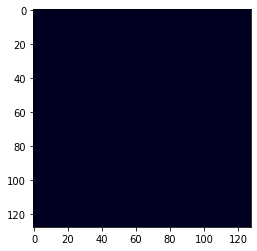

In [36]:
plt.imshow(a.to("cpu").permute(1, 2, 0).detach().numpy())

In [37]:
a

tensor([[[-2.2336e-04, -2.9881e-04, -1.3250e-04,  ..., -3.1018e-04,
          -1.5752e-04, -3.2516e-04],
         [-1.8309e-04, -3.7210e-04, -1.0103e-04,  ..., -3.7626e-04,
          -6.5733e-05, -3.1236e-04],
         [-2.1834e-04, -2.7480e-04, -1.3571e-04,  ..., -2.7540e-04,
          -1.1494e-04, -3.0941e-04],
         ...,
         [-1.9052e-04, -3.6233e-04, -9.9848e-05,  ..., -3.8094e-04,
          -8.0590e-05, -3.1483e-04],
         [-2.1163e-04, -2.2738e-04, -2.3949e-04,  ..., -2.4237e-04,
          -2.1139e-04, -2.8297e-04],
         [-2.0223e-04, -3.4363e-04, -1.7842e-04,  ..., -3.3784e-04,
          -1.7430e-04, -3.0405e-04]],

        [[-7.8701e-04, -9.6554e-04, -7.2125e-04,  ..., -9.6803e-04,
          -7.7809e-04, -8.3502e-04],
         [-7.7245e-04, -8.6957e-04, -8.4498e-04,  ..., -8.5419e-04,
          -8.3850e-04, -8.6295e-04],
         [-8.5485e-04, -9.4614e-04, -8.0544e-04,  ..., -9.5293e-04,
          -8.5247e-04, -8.1712e-04],
         ...,
         [-7.6235e-04, -8